# Programmer votre IA pour acheter votre voiture

Vous travaillez depuis un an en tant qu'expert en data et avez économisé assez d'argent
pour acheter une voiture. En tant qu'expert en données et étant assez économe, vous
voulez en avoir pour votre argent !!!
Imaginez que vous ayez également des données du site Web de voitures CarDekho, qui
contient des informations sur une grande variété de voitures, y compris leur prix. Vous
réalisez que vous pouvez utiliser ces données pour vous assurer d'obtenir une bonne affaire
sur une nouvelle voiture. En particulier, vous pouvez déterminer exactement combien vous
devriez payer pour un type de voiture spécifique. Cela peut être particulièrement utile si vous
rencontrez un vendeur de voitures difficile!
Mais la question est de savoir comment utiliser les données pour déterminer combien vous
devriez payer ?

## 1. La première étape est la récupération des données.
Nous utiliserons la bibliothèque de science des données appelée Pandas pour charger
l'ensemble des données. Au travers de Pandas, il est possible de lire le fichier de données
(carData.csv). Les données seront ensuite affectées et stockées dans une variable, par
exemple : car_data.

In [12]:
#IMPORT LIBRAIRIES
##OS
import time
from sqlalchemy import create_engine
from IPython.display import Image
##Dieu
import pandas as pd
##Calculation
import numpy as np
from scipy import stats
from sklearn import linear_model 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import svm
#Graph
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
#Dash
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px

In [13]:
def fitline(x,y):
    #     Ajuste une droite d'équation a*x + b sur les points (x, y) par la méthode
    # des moindres carrés.

    # Args :
    #     * x (list): valeurs de x
    #     * y (list): valeurs de y

    # Return:
    #     * slope (float): pente de la droite
    #     * intercept (float): ordonnée à l'origine
    npoints = len(x)
    # calculs des parametres slope & intercept
    slope = (npoints * (x*y).sum() - x.sum()*y.sum()) / (npoints*(x**2).sum() - (x.sum())**2)
    intercept = ((x**2).sum()*y.sum() - x.sum() * (x*y).sum()) / (npoints * (x**2).sum() - (x.sum())**2)
    # renvoie des parametres
    return slope , intercept

def prediction(x):
    return slope * x + intercept

def importdata(x, link, table):
    
    print("Reading data..")
    col = x.split()
    start_time = time.time()
    df = pd.read_csv(link, encoding="UTF-8")
    df.columns = col
    print("Done.")
    df.to_sql(table, con = engine, if_exists='append', index=False)
    return print("-- Loading time : %s secondes. --" % (time.time() - start_time))

# def r2_calculation(x,y):
#     # P2 = np.polyfit(valeur_T,valeur_min, 2)
# # p= np.poly1d(P2)
# # yhat = p(valeur_T)
# # ybar = sum(valeur_min)/len(valeur_min)
# # SST = sum((valeur_min - ybar)**2)
# # SSreg = sum((yhat - ybar)**2)

# # R2 = SSreg/SST
# # print R2
#     # yhat = predict(x)
#     # ybar = sum(y)/len(y
#     # SST = sum((y - ybar)**2)
#     # SSreg = sum((yhat - ybar)**2)

## 2. Explorer les données.
Parcourir les colonnes pour s'approprier les données. Quelle est la taille du jeux de
données. Calculer quelques statistiques de base (moyenne, médiane, quartile, tracer la
distribution avec Matplotlib (histogramme).

In [14]:
df = pd.read_csv('./carData2.csv')
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_TypeInt,Seller_Bool,Transmission_Bool
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189,0.405316,0.352159,0.867110
std,2.891554,5.082812,8.644115,38886.883882,0.247915,0.801148,0.478439,0.340021
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,0.000000,0.000000,1.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,0.000000,0.000000,1.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,0.000000,1.000000,1.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000,2.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe407baf7d0>,
      dtype=object)

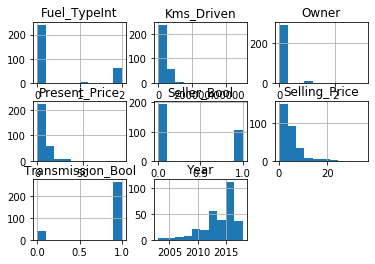

In [15]:
# histogramme
df.hist()

## 3. Charger vos données dans une base de données MySQL. A partir de cette question, vos données devront être récupérées directement via la base de données.

### Création de la database et la table
```
use dataAi;

drop table if exists cardata;

create table cardata(
Car_Name VARCHAR(50)
,Year INT(4)
,Selling_Price FLOAT(4)
,Present_Price FLOAT(4)
,Kms_Driven INT(10)
,Fuel_Type VARCHAR(50) 
,Seller_Type VARCHAR(50)
,Transmission VARCHAR(50)
,Owner INT(5)
,Fuel_TypeInt INT(3)
,Seller_Bool TINYINT(1)
,Transmission_Bool TINYINT(1)
)
; 
```

In [16]:
#Connection MySQL 
engine = create_engine("mysql+pymysql://root@localhost/dataAi")
df = pd.read_sql_table('cardata',engine)

import_column = "Car_Name   Year    Selling_Price   Present_Price   Kms_Driven    Fuel_Type     Seller_Type     Transmission    Owner    Fuel_TypeInt   Seller_Bool    Transmission_Bool"

# Data cleaning on passe des bolean pour Transmission, SellerType et du Int pour Fuel.
# df2 = pd.read_csv('./data/carData.csv')

# df2['Fuel_TypeInt'] = df2['Fuel_Type'].replace({'Petrol':0, 'CNG':1, 'Diesel':2})
# df2['Seller_Bool'] = df2['Seller_Type'].astype('category').cat.codes
# df2['Transmission_Bool'] = df2['Transmission'].replace({'Manual':1, 'Automatic':0})

# df2.to_csv('./data/carData2.csv',index=False)

# importdata(import_column,'./carData2.csv', 'cardata')

## 4. Visualiser les données grâce à la librairie Seaborn.
Notamment avec le type de tracé `catplot`, expliquer dans quel cas ce type de tracé est
pertinent.

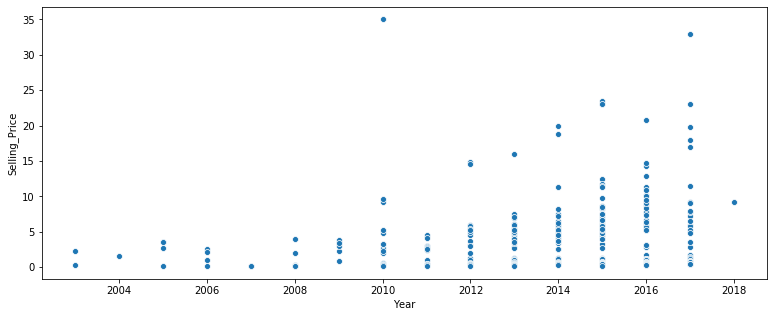

In [17]:
fig_dims = (13,5)
fig , ax =plt.subplots(figsize = fig_dims)
sns.scatterplot(x = 'Year', y = 'Selling_Price', data = df)

In [18]:
trace1 =go.Scatter(
                    x = df['Fuel_Type'],
                    y = df['Selling_Price'],
                    mode = "markers",
                    name = "Selling",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = df.Fuel_Type)
trace2 =go.Scatter(
                    x = df['Fuel_Type'],
                    y = df['Present_Price'],
                    mode = "markers",
                    name = "Present",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = df.Fuel_Type)
data = [trace1, trace2]
layout = dict(title = 'Prix en fonction du carburant',
              xaxis = dict(title = 'Carburant',ticklen = 5,zeroline = False),
              yaxis = dict(title = 'Prix',ticklen= 5,zeroline = False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

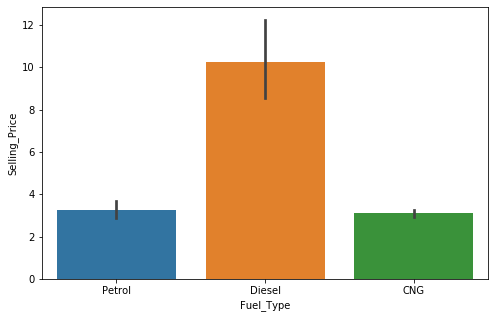

In [19]:
fig_dims = (8,5)
fig , ax =plt.subplots(figsize = fig_dims)
sns.barplot(x='Fuel_Type', y='Selling_Price', data=df)

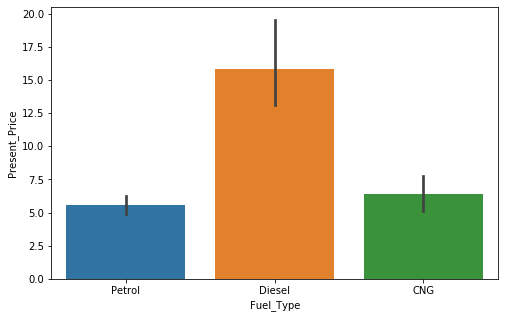

In [20]:
fig_dims = (8,5)
fig , ax =plt.subplots(figsize = fig_dims)
sns.barplot(x='Fuel_Type', y='Present_Price', data=df)

In [1]:
# Messing with seaborn(benchmarking)
# # sns.distplot('Fuel_TypeInt', kde = True)
# # sns.pairplot(df, hue ='Seller_Bool', bw=1.5)

In [22]:
# Messing with seaborn(benchmarking) still
# sns.catplot( y='Year', x='Kms_Driven',data=df)

In [23]:
# Messing with seaborn(benchmarking) \_(0-0)_/
# sns.catplot(data=car_data, kind="strip", x="Car_Name", y="Selling_Price", hue="Year")

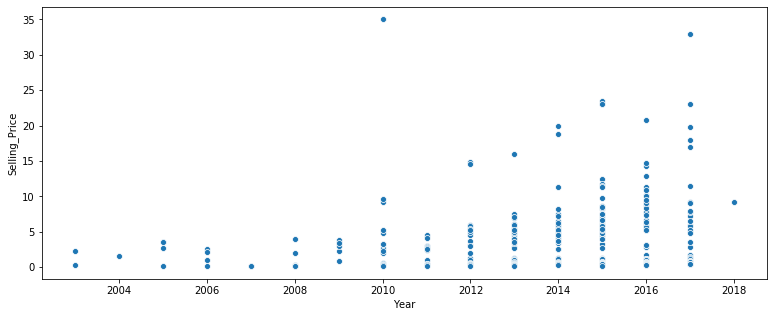

In [24]:
# df['Age'] = 2018 - df['Year'] 
x = df.iloc[0:len(df),1]
y = df.iloc[0:len(df),2]

fig_dims = (13,5)
fig , ax =plt.subplots(figsize = fig_dims)
sns.scatterplot(x=x,y=y,ax=ax)

## 5. Quantifier la relation entre l'âge et le prix de vente
Réaliser une veille sur la régression linéaire. Pour rappel ... la régression linéaire est une méthode permettant de découvrir la relation entre deux variables de l'ensemble de données, telles que le prix de la voiture et l'année de fabrication. Les Data Scientists s'appuient sur cette méthode pour résoudre un large éventail de problèmes, notamment en matière de prédiction. Est-ce que notre jeux de données est adapté à ce type d'algorithme (ou existe-t-il une corrélation linéaire entre les variables ?).Proposer un outil de visualisation Matplotlib permettant d'appuyer votre argumentation.

### 5.1. Appliquer l’algorithme de régression linéaire univariée en vous aidant de la librairie ​Numpy. **scipy.stats.linregress**

In [30]:
x = df['Year'].values
y = df['Selling_Price'].values

slope , intercept = fitline(x,y)
predict = prediction(x)

print("-- Loading time : %s secondes. --" % (time.time() - start_time))
# Slope est la pente, Intercept c'est le point d'interception entre la pente et une valeur.

plt.figure(figsize=(13,5))
plt.scatter(x,y)
plt.plot(x, predict, c='r')

NameError: name 'start_time' is not defined

### 5.2. Appliquer l’algorithme de régression linéaire univariée en vous aidant de la librairie ​Scipy. numpy.polyfit()

-- Loading time : 1984.05233669281 secondes. --


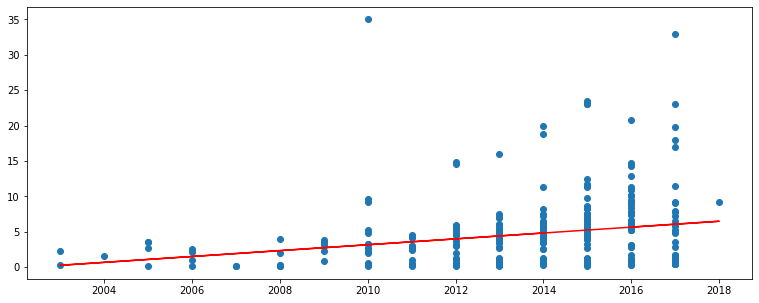

In [128]:
x = df['Year']
y = df['Selling_Price']

model = np.polyfit(x,y,1)
result = np.poly1d(model)
print("-- Loading time : %s secondes. --" % (time.time() - start_time))

plt.figure(figsize=(13,5))
plt.scatter(x,y)
plt.plot(x,result(x), c='red')

### 5.3. Appliquer l’algorithme de régression linéaire univariée en vous aidant de la librairie ​ sklearn. 

-- Loading time : 1001.52916431427 secondes. --
Coéfficient: [0.41509169] Résultat: -831.1789245913277


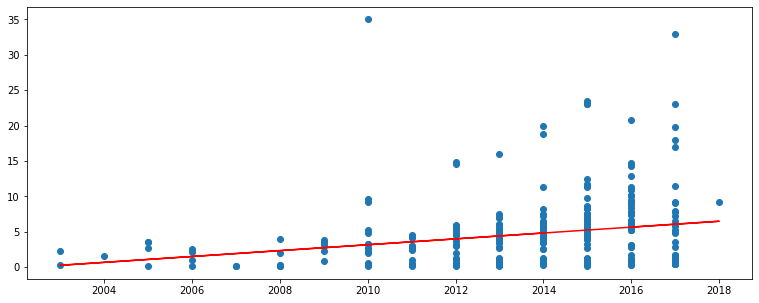

In [110]:
# For some reason need to be reshape everywhere?????
x = df['Year'].values.reshape(-1,1)
y = df['Selling_Price']
#############################

model = linear_model.LinearRegression()
result = model.fit(x,y)
print("-- Loading time : %s secondes. --" % (time.time() - start_time))
print("Coéfficient:",(result.coef_),"Résultat:",(result.intercept_))

plt.figure(figsize=(13,5))
plt.scatter(x,y)
plt.plot(x, result.predict(x),'r')

### 5.4. Améliorer le modèle en utilisant plusieurs variables d'entrée​ , telles que `Kms_Driven` et `Transmission` (réaliser une régression linéaire multiple en Python avec sklearn).

In [205]:
y = df['Year'].values.reshape(-1,1)
x = df[['Selling_Price','Present_Price']]

model = linear_model.LinearRegression()
result = model.fit(x,y)

print(" -- Loading time : %s secondes. --" % (time.time() - start_time))
# Calcule le R2 
print('R2 Score:',model.score(x,y))
print('Intercept:', model.intercept_,)
print('Coefficients:', model.coef_)

 -- Loading time : 2091.288592338562 secondes. --
R2 Score: 0.3420574604859178
Intercept: [2013.24965204]
Coefficients: [[ 0.69542337 -0.37534635]]


In [2]:
df = pd.read_sql_table('cardata',engine)

df.to_numpy()
# df1 = pd.DataFrame({"Year": df["Year"], "Present_Price": df["Present_Price"], "Selling_Price":df["Selling_Price"], "kms_Driven":df["Kms_Driven"], "Transmission" : df["Transmission_Bool"]})
fig_dims = (10,7)
fig , ax =plt.subplots(figsize = fig_dims)
sns.heatmap(df.corr(), annot=True, cbar = True, cmap ='viridis')

NameError: name 'pd' is not defined

In [7]:
x = df['Selling_Price']
y = df['Present_Price']

model = np.polyfit(x,y,1)
result = np.poly1d(model)
print("-- Loading time : %s secondes. --" % (time.time() - start_time))

plt.figure(figsize=(13,5))
plt.scatter(x,y,label='Values')
plt.plot(x,result(x), c='red', label='RegLine')
plt.legend()
plt.show()

NameError: name 'df' is not defined

## 5. Créer VOTRE Class LinearRegression. 
Ne pas utiliser de fonctions de régression linéaire existante (comme précédemment vue).

In [199]:
class linereg:
    def __init__(self, abscisse, ordonné):
        self.xbis = abscisse
        self.ybis = ordonné
    def fitline(self):
        npoints = len(self.xbis)
        slope = (npoints * (self.xbis*self.ybis).sum() - self.xbis.sum()*self.ybis.sum()) / (npoints*(self.xbis**2).sum() - (self.xbis.sum())**2)
        intercept = ((self.xbis**2).sum()*self.ybis.sum() - self.xbis.sum() * (self.xbis*self.ybis).sum()) / (npoints * (self.xbis**2).sum() - (self.xbis.sum())**2)
        return slope , intercept
    def prediction(self,slope,intercept):
        return slope * x + intercept

x = df['Year']
y = df['Selling_Price']

feet = linereg(x,y)

t,u = feet.fitline()
feet.prediction(t,u)

0      4.815748
1      4.400657
2      6.061023
3      3.570473
4      4.815748
         ...   
296    5.645932
297    5.230840
298    2.740290
299    6.061023
300    5.645932
Name: Year, Length: 301, dtype: float64

## 6. Pensez-vous possible de résoudre ce problème en implémentant un algorithme de Support Vector Machines (SVM)​ ? Justifier votre réponse

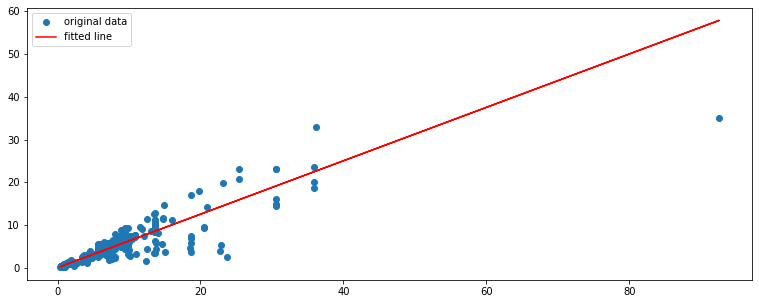

In [43]:
X = df['Present_Price'].values
y = df['Selling_Price']
x = np.array(X).reshape(-1,1)

scaler = StandardScaler()
scaler.fit_transform(x)
regr = svm.SVR(kernel = "linear")
regr.fit(x,y)

resultat = regr.predict(x)

plt.figure(figsize=(13,5))
plt.plot(x, y, 'o', label='Values')
plt.plot(x, resultat, 'r', label='RegLine')
plt.legend()
plt.show()

## 7. Héberger vos sources sous github

## 8. Proposer un dashboard comme livrable de votre étude​ .

```$ python etude.py``` then go to http://127.0.0.1:8050/

## 9. Question bonus : Vous avez trouvé votre voiture au meilleur prix, vous l’achetez. 3 joursaprès, vous êtes en panne. Quelles données manque-il à votre analyse ?

Il manquerait principalement des datas concernant le suivi de la voiture(Révision,pannes précédente,si le modèle de la voiture à des antécédant). 